In [1]:
# Necessary modules for data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
from pandas import DataFrame,Series

In [2]:
#Creation of DataFrame
data_df = pd.read_csv('primary_results.csv')

In [3]:
data_df.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445
1,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205
2,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148
3,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146
4,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13212 entries, 0 to 13211
Data columns (total 8 columns):
state                 13212 non-null object
state_abbreviation    13212 non-null object
county                13212 non-null object
fips                  13212 non-null int64
party                 13212 non-null object
candidate             13212 non-null object
votes                 13212 non-null int64
fraction_votes        13212 non-null float64
dtypes: float64(1), int64(2), object(5)
memory usage: 825.8+ KB


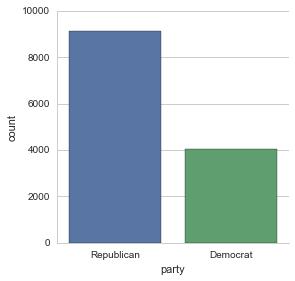

In [5]:
#Count of Republic and Democrat candidates in the data-sets  
sns.factorplot('party',data=data_df,kind='count')

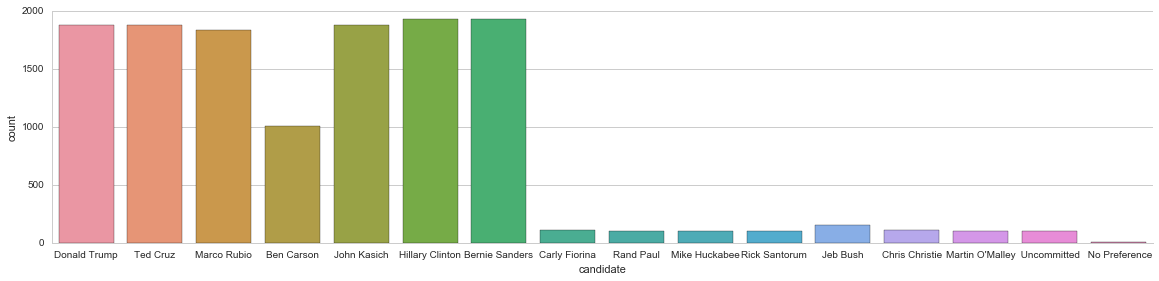

In [7]:
#Count of candidates in the data-sets
sns.factorplot('candidate',data=data_df,kind='count',aspect=4)

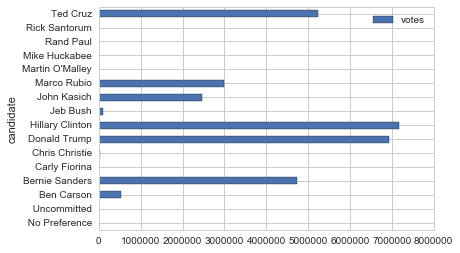

In [8]:
#Total votes per candidate in the dataset
data_df_new = data_df.groupby(data_df['candidate'])['votes'].sum().plot(kind='barh',legend=True)

In [16]:
data_df_new = data_df.groupby(data_df['candidate'])['votes'].sum()
data_df_new

candidate
 No Preference         313
 Uncommitted            43
Ben Carson          528463
Bernie Sanders     4740278
Carly Fiorina        15181
Chris Christie       24347
Donald Trump       6944654
Hillary Clinton    7178257
Jeb Bush             94394
John Kasich        2456406
Marco Rubio        2998335
Martin O'Malley        747
Mike Huckabee         3300
Rand Paul             8460
Rick Santorum         1773
Ted Cruz           5248807
Name: votes, dtype: int64

In [60]:
#Highest votes in the state: 
data_df_state = data_df.groupby(data_df['state'])['votes'].sum()
i = 0
max_votes = data_df_state.max()
for votes in data_df_state:
    if votes == max_votes:
        print "Highest vote-count is %s and counted in %s state" %(votes,data_df_state.index[i])
    else:
        i = i+1

Highest vote-count is 4091652 and counted in Texas state


In [61]:
data_df.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445
1,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205
2,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148
3,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146
4,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035


In [82]:
data_df_state_votes = pd.concat([data_df.state,data_df.votes],axis=1)

In [83]:
data_df_state_votes.head()

,state,votes
0,Alabama,5387
1,Alabama,2482
2,Alabama,1785
3,Alabama,1764
4,Alabama,421


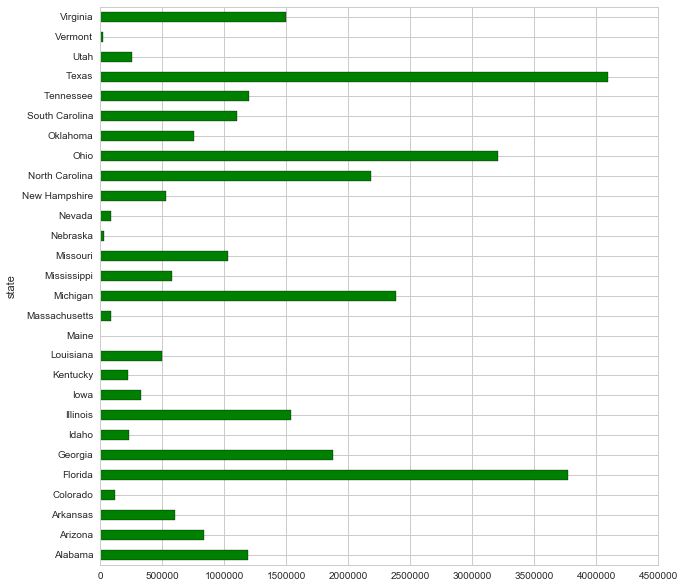

In [88]:
#Vote-count per state
data_df_state_votes.groupby('state')['votes'].sum().plot(kind='barh',figsize=(10,10),color='green')

In [105]:
#Vote-count per state per party(republic/democrat)
data_df_state_party = data_df.pivot_table('votes',index='state',columns='party',aggfunc='sum')

In [106]:
data_df_state_party.head()

party,Democrat,Republican
state,,
Alabama,381810.0,805814.0
Arizona,399097.0,435103.0
Arkansas,207182.0,395108.0
Colorado,121184.0,NaN
Florida,1611617.0,2156298.0


In [96]:
data_df_state_party.fillna(0,inplace=True)
data_df_state_party.head()

party,Democrat,Republican
state,,
Alabama,381810.0,805814.0
Arizona,399097.0,435103.0
Arkansas,207182.0,395108.0
Colorado,121184.0,0.0
Florida,1611617.0,2156298.0


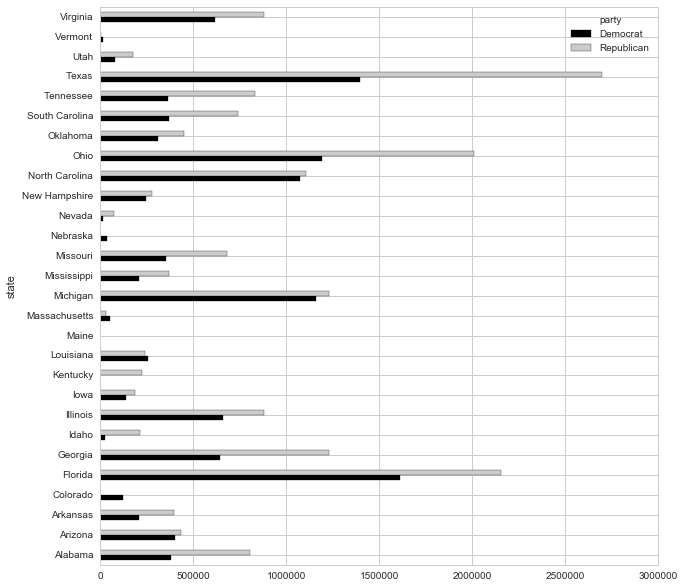

In [103]:
data_df_state_party.plot(kind='barh',figsize=(10,10),cmap='spectral')

In [112]:
data_df_state_party.dropna()

party,Democrat,Republican
state,,
Alabama,381810.0,805814.0
Arizona,399097.0,435103.0
Arkansas,207182.0,395108.0
Florida,1611617.0,2156298.0
Georgia,642420.0,1232089.0
Idaho,23567.0,211484.0
Illinois,658976.0,881888.0
Iowa,139682.0,185508.0
Louisiana,256849.0,240017.0


In [116]:
#Vote-Difference per state per party
data_df_state_party_votes=data_df_state_party.dropna()
data_df_state_party_votes['Difference']=(data_df_state_party_votes.Democrat - data_df_state_party_votes.Republican)/100

C:\Users\Mithun\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [121]:
pd.DataFrame(data_df_state_party_votes)

party,Democrat,Republican,Difference
state,,,
Alabama,381810.0,805814.0,-4240.04
Arizona,399097.0,435103.0,-360.06
Arkansas,207182.0,395108.0,-1879.26
Florida,1611617.0,2156298.0,-5446.81
Georgia,642420.0,1232089.0,-5896.69
Idaho,23567.0,211484.0,-1879.17
Illinois,658976.0,881888.0,-2229.12
Iowa,139682.0,185508.0,-458.26
Louisiana,256849.0,240017.0,168.32


In [142]:
data_df.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445
1,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205
2,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148
3,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146
4,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035


In [151]:
#Total vote count per state and party
data_df_party_votes = pd.concat((data_df['party'],data_df['votes']),axis=1)

In [154]:
data_df_party_votes.head()

,party,votes
0,Republican,5387
1,Republican,2482
2,Republican,1785
3,Republican,1764
4,Republican,421


In [155]:
data_df_party_votes_count = data_df_party_votes.groupby('party')['votes'].sum()

In [156]:
data_df_party_votes_count.head()

party
Democrat      11919638
Republican    18324120
Name: votes, dtype: int64

In [157]:
data_df_party_votes = pd.concat((data_df['state'],data_df['party'],data_df['votes']),axis=1)

In [165]:
data_df_party_votes_count = pd.DataFrame(data_df_party_votes.groupby(['party','state'])['votes'].sum())

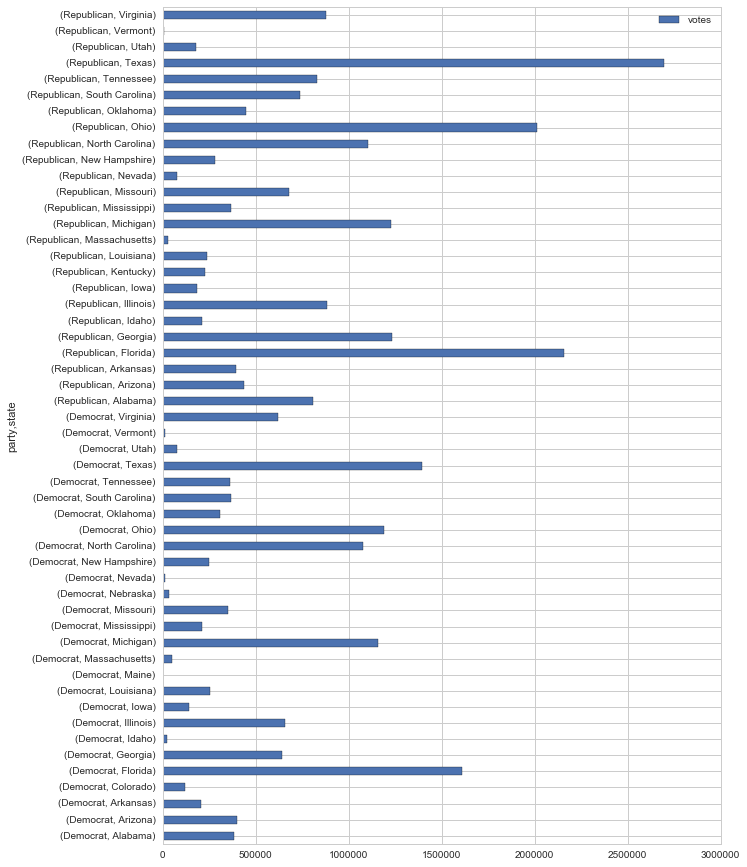

In [171]:
data_df_party_votes_count.plot(kind='barh',figsize=(10,15))

In [172]:
data_df_party_votes_count.head()

votes
party    state            
Democrat Alabama    381810
         Arizona    399097
         Arkansas   207182
         Colorado   121184
         Florida   1611617

In [9]:
data_df.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445
1,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205
2,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148
3,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146
4,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035


In [15]:
#Name of unique candidates:
data_df.candidate.unique()

array(['Donald Trump', 'Ted Cruz', 'Marco Rubio', 'Ben Carson',
       'John Kasich', 'Hillary Clinton', 'Bernie Sanders', 'Carly Fiorina',
       'Rand Paul', 'Mike Huckabee', 'Rick Santorum', 'Jeb Bush',
       'Chris Christie', "Martin O'Malley", ' Uncommitted',
       ' No Preference'], dtype=object)

In [32]:
data_df.candidate.count()

13212

In [12]:
#Total Votes per state per candidate:
def name(name_candidate):
    name = name_candidate
    if name == 'Donald Trump':
        return name
    elif name == 'Ted Cruz':
        return name
    elif name == 'Hillary Clinton':
        return name
    elif name == 'Bernie Sanders':
        return name
    else:
        return np.nan

In [13]:
data_df['name'] = data_df['candidate'].apply(name)

In [14]:
data_df.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes,name
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445,Donald Trump
1,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205,Ted Cruz
2,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148,NaN
3,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146,NaN
4,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035,NaN


In [15]:
data_df_candidate_votes = pd.concat([data_df.state,data_df.votes,data_df.name],axis=1)

In [18]:
data_df_candidate_votes = data_df_candidate_votes.dropna()

In [21]:
data_df_candidate_votes = pd.DataFrame(data_df_candidate_votes.groupby(['name','state'])['votes'].sum())

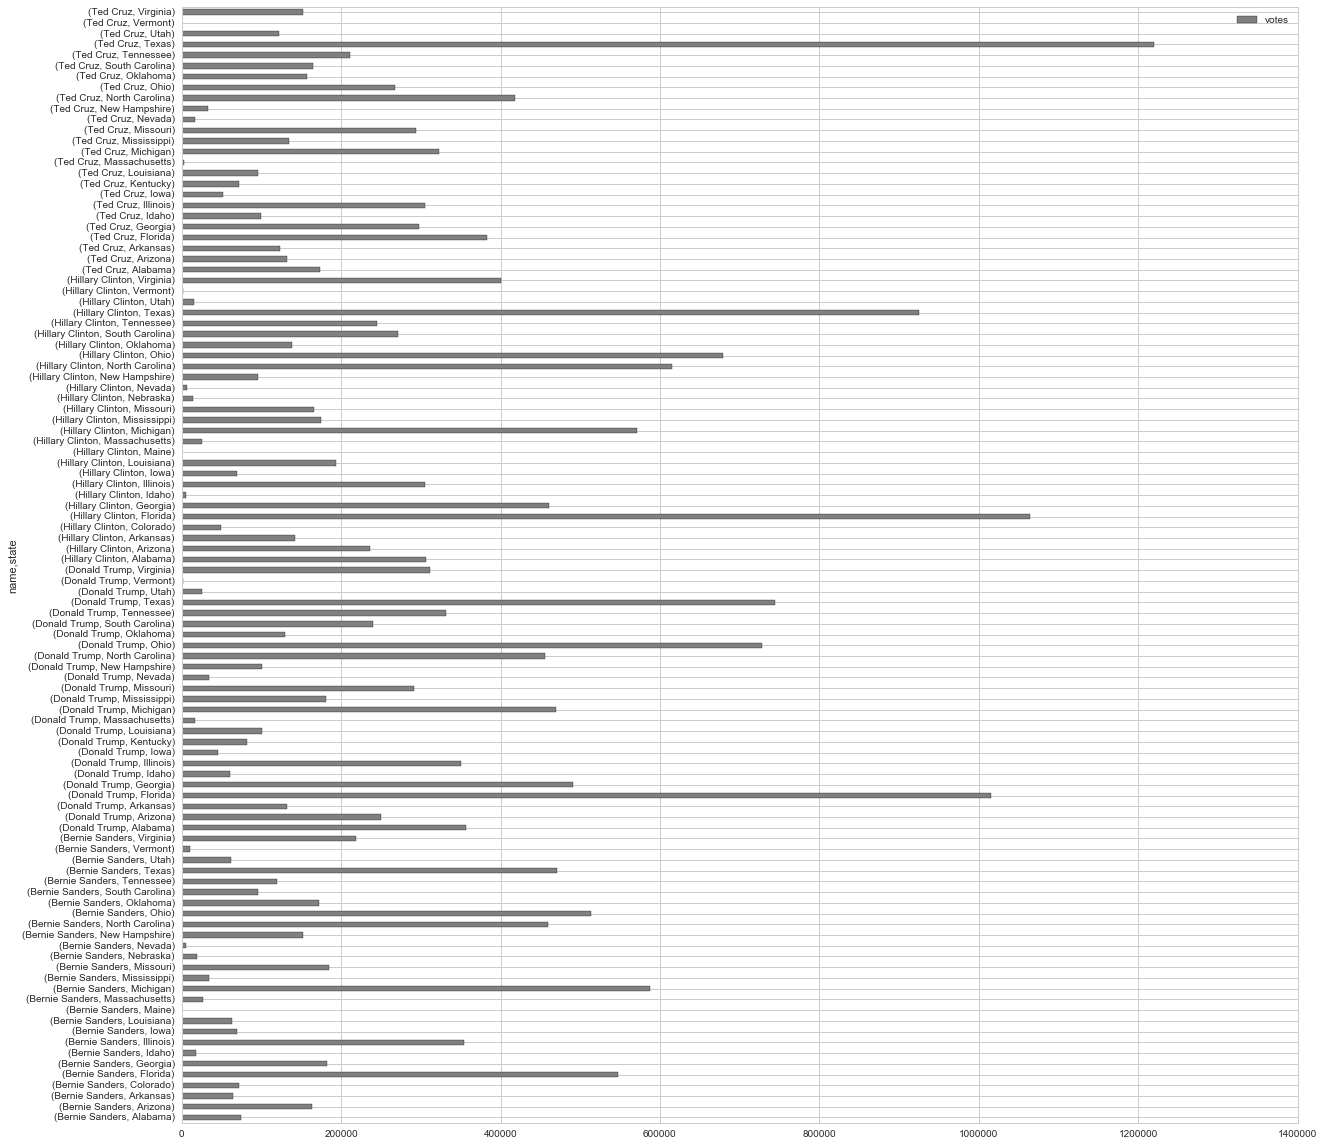

In [32]:
data_df_candidate_votes.plot(kind = 'barh',legend = True,figsize = (20,20),color='grey')